In [2]:
#Create a database if the data is in the form of an .xlsx (Excel) file
import sqlite3
import pandas as pd
#Name of xlsx file. SQLite database will have the same name and extension .db
#Change the path to the production file

In [3]:
filename=r"C:\Users\ayushrastogi\OneDrive\ML DS Big Data\Meetup\Big Data Meetup\CO Production Data\excel\colorado"
con=sqlite3.connect(filename+"database.db")

In [3]:
#DO NOT Run if the database already exists

#Using pandas to read the excel and function 'to_sql' to export the data
wb=pd.read_excel(filename+'.xlsx',sheetname=None)
for sheet in wb:
    wb[sheet].to_sql(sheet,con, index=False)
con.commit() #Committing the change
con.close() #Close the connection

C:\Users\ayushrastogi\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:1201: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [4]:
import matplotlib.pyplot as plt
from os.path import isfile, join  
import numpy as np 
plt.style.use('ggplot')    

conn = sqlite3.connect('C:/Users/ayushrastogi/OneDrive/ML DS Big Data/Meetup/Big Data Meetup/CO Production Data/excel/coloradodatabase.db')
cur = conn.cursor()

In [24]:
# Entire Codell Data
data = pd.read_sql_query(''' SELECT *
                             FROM ProductiontableCO 
                             ''', conn)

print(data.columns)
print(data.shape)

Index(['API/UWI', 'Operator Alias', 'Well/Lease Name', 'Well Number',
       'Entity Type', 'County/Parish', 'Reservoir', 'Production Type',
       'Producing Status', 'Drill Type',
       ...
       'Survey', 'OCS Area', 'PGC Area', 'Surface Latitude (WGS84)',
       'Surface Longitude (WGS84)', 'Reported Operator', 'Last 12 Oil',
       'Last 12 Gas', 'Last 12 Water', 'Entity ID'],
      dtype='object', length=104)
(126963, 104)


In [43]:
data_codell = pd.read_sql_query(''' SELECT *
                                    FROM ProductiontableCO 
                                    WHERE Reservoir='CODELL'
                                    LIMIT 10
                                    ''', conn)
print (data_codell)
type(data_codell)

         API/UWI                  Operator Alias        Well/Lease Name  \
0  5069061710000           MAGPIE OPERATING, INC               HAMILTON   
1  5123104720000  ANADARKO PETROLEUM CORPORATION                  REEVE   
2  5123105280000  ANADARKO PETROLEUM CORPORATION                 ASBURY   
3  5123105340000              NOBLE ENERGY, INC.                 WATSON   
4  5123111010000              NOBLE ENERGY, INC.                HOSHIKO   
5  5123111040000           MONAHAN GAS & OIL INC                KNISTER   
6  5123111070000              HS RESOURCES, INC.  UPRR 22 PAN AM P-TRUE   
7  5123111110000                      PDC ENERGY             KILLEYBEGS   
8  5123111610000  ANADARKO PETROLEUM CORPORATION           VICTOR USX W   
9  5123111650000                  SRC ENERGY INC                ENGLISH   

           Well Number Entity Type County/Parish Reservoir Production Type  \
0                    1        WELL  LARIMER (CO)    CODELL             GAS   
1             41-1

pandas.core.frame.DataFrame

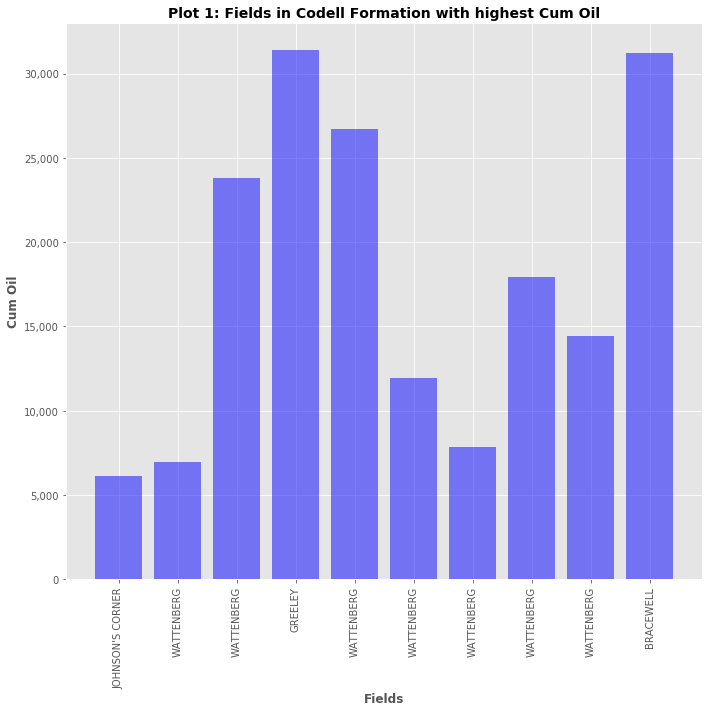

In [44]:
fig, ax = plt.subplots()
axes = plt.gca()
x = np.arange(len(data_codell['Field']))
y = data_codell['Cum Oil'].values
x_name = data_codell['Field']
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
fig.subplots_adjust(top=0.85)
ax.set_title('Plot 1: Fields in Codell Formation with highest Cum Oil', fontsize=14, fontweight='bold')
ax.set_xlabel('Fields', fontsize = 12, fontweight='bold')
ax.set_ylabel('Cum Oil', fontsize = 12, fontweight='bold')
plt.grid = False
plt.xticks(x, x_name, rotation=90)
fig.set_size_inches(10, 10)
ax.bar(x,y, align='center', alpha=0.5, color = 'b')
plt.tight_layout()
plt.show()